# SALES PREDICTION

#### - developing a model that can predict future sales for businesses; to optimize their advertising strategies and maximize their sales potential 

### IMPORTING ESSENTIAL LIBRARIES 

In [1]:
import pandas as pd     
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

### DATA COLLECTION, PROCESSING AND ANALYSIS

In [2]:
df = pd.read_csv("advertising.csv")

In [3]:
df.shape

(200, 4)

In [4]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [5]:
df.tail()

,TV,Radio,Newspaper,Sales
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5
199,232.1,8.6,8.7,18.4


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [7]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [8]:
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [9]:
df.duplicated().sum()

0

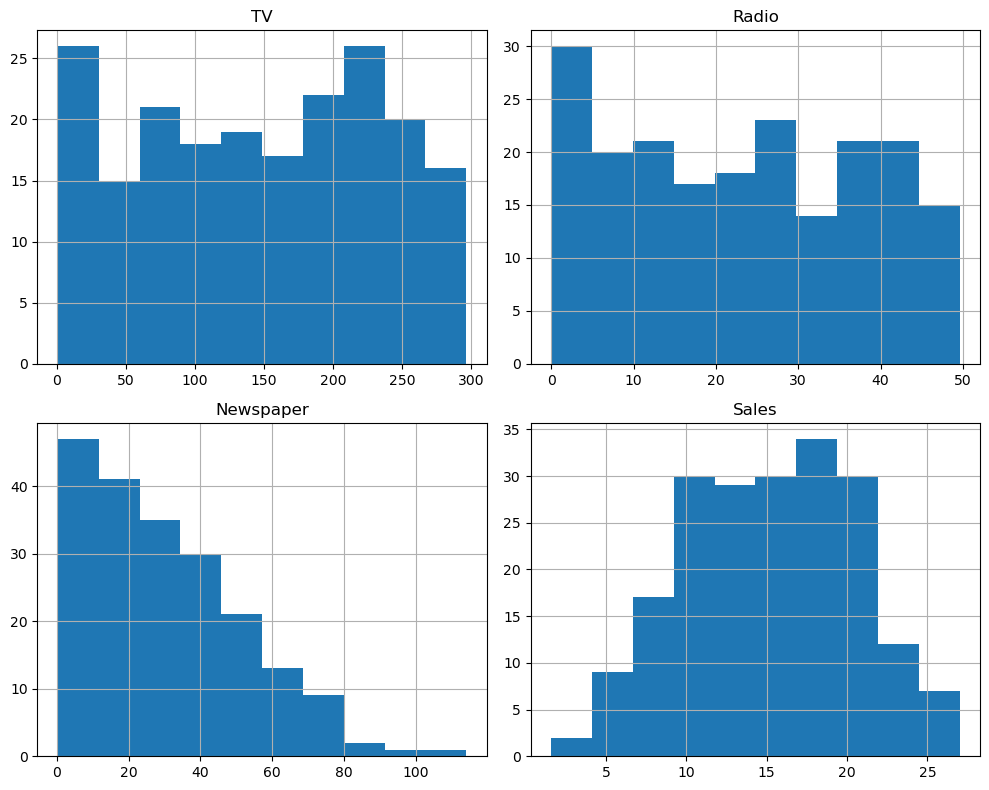

In [10]:
df.hist(bins=10, figsize=(10, 8))
plt.tight_layout()
plt.show()

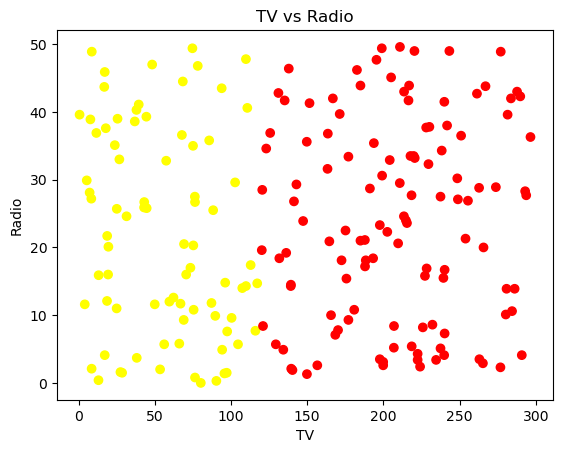

In [11]:
colors = ['red' if length >= 120 else 'yellow' for length in df['TV']]
plt.scatter(df['TV'], df['Radio'], c=colors)
plt.xlabel('TV')
plt.ylabel('Radio')
plt.title('TV vs Radio')
plt.show()

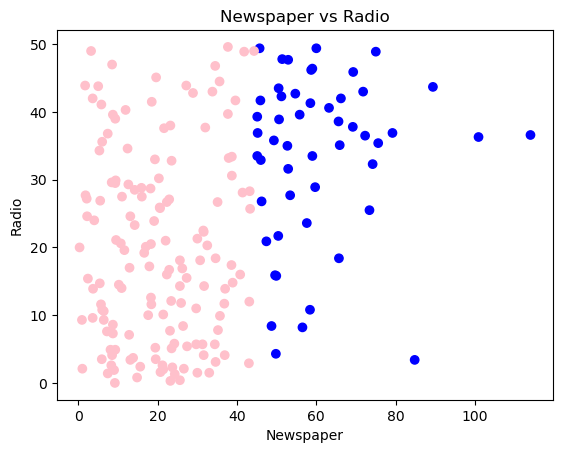

In [12]:
colors = ['blue' if length >= 45 else 'pink' for length in df['Newspaper']]
plt.scatter(df['Newspaper'], df['Radio'], c=colors)
plt.xlabel('Newspaper')
plt.ylabel('Radio')
plt.title('Newspaper vs Radio')
plt.show()

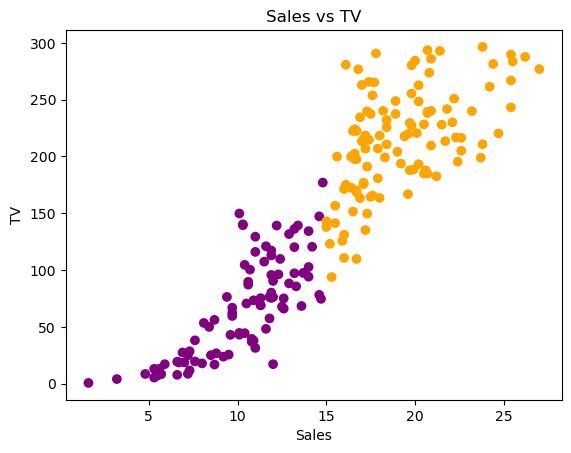

In [13]:
colors = ['orange' if length >= 15 else 'purple' for length in df['Sales']]
plt.scatter(df['Sales'], df['TV'], c=colors)
plt.xlabel('Sales')
plt.ylabel('TV')
plt.title('Sales vs TV')
plt.show()

                 TV     Radio  Newspaper     Sales
TV         1.000000  0.054809   0.056648  0.901208
Radio      0.054809  1.000000   0.354104  0.349631
Newspaper  0.056648  0.354104   1.000000  0.157960
Sales      0.901208  0.349631   0.157960  1.000000


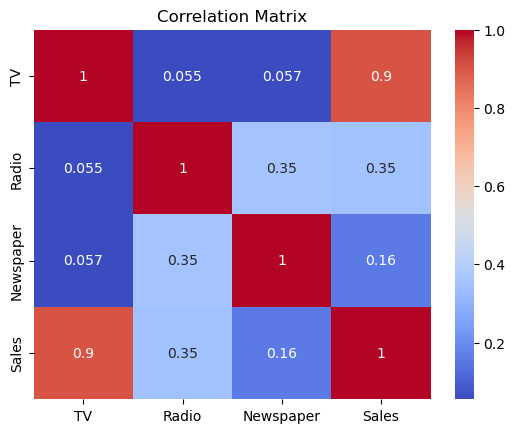

In [14]:
columns = ['TV', 'Radio', 'Newspaper', 'Sales']
correlation_matrix = df[columns].corr()
print(correlation_matrix)
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

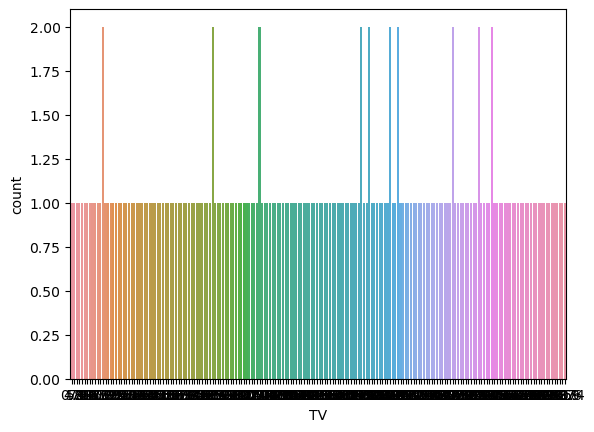

In [15]:
sns.countplot(x='TV', data=df, )
plt.show()

<AxesSubplot: >

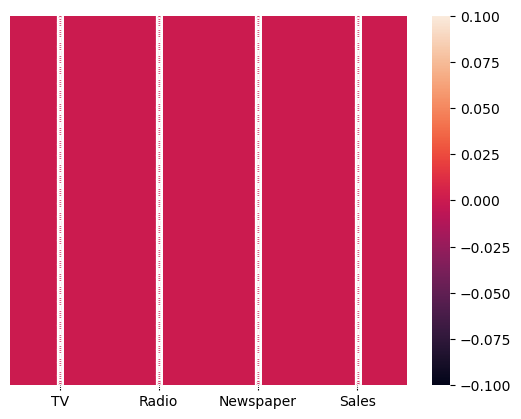

In [16]:
sns.heatmap(df.isnull(), yticklabels=False, annot=True)

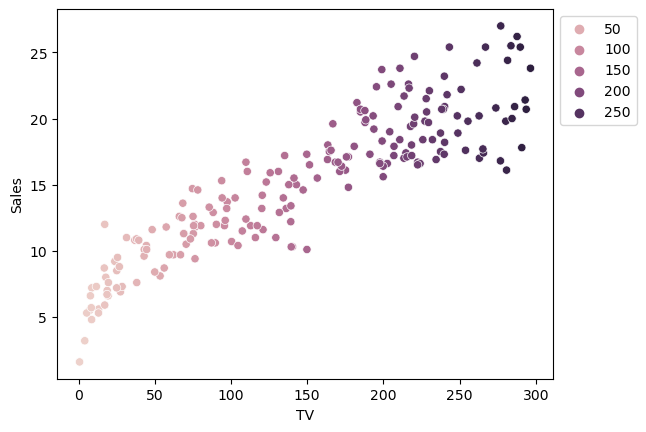

In [17]:
sns.scatterplot(x='TV', y='Sales', hue='TV', data=df, )
plt.legend(bbox_to_anchor=(1, 1), loc=2)
plt.show()

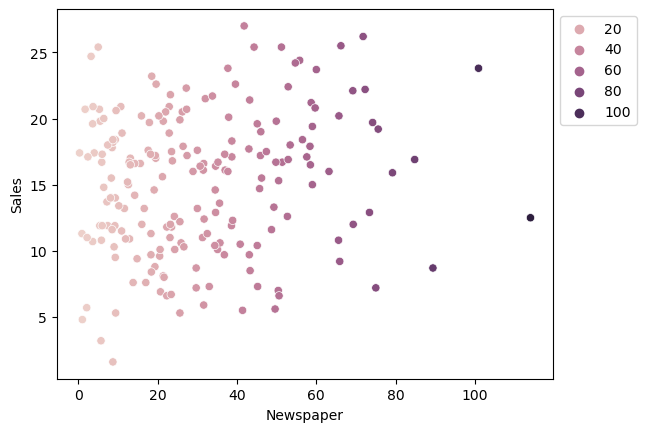

In [18]:
sns.scatterplot(x='Newspaper', y='Sales', hue='Newspaper', data=df, )
plt.legend(bbox_to_anchor=(1, 1), loc=2)
plt.show()

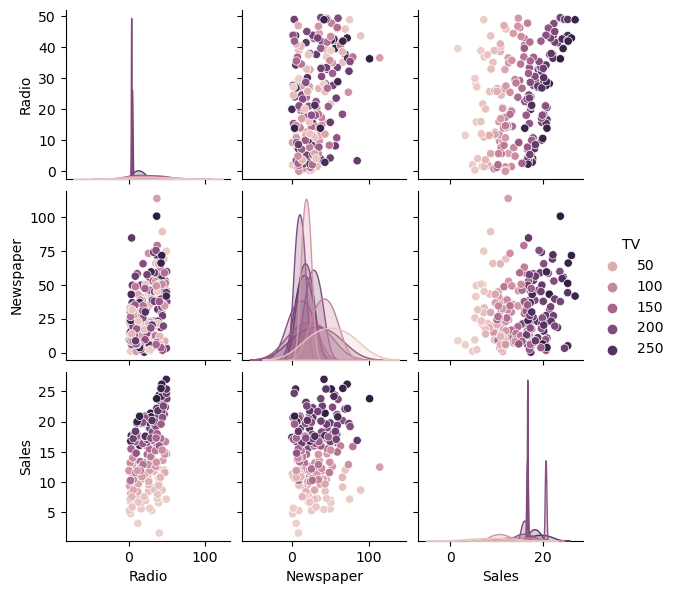

In [19]:
sns.pairplot(df, hue='TV', height=2)

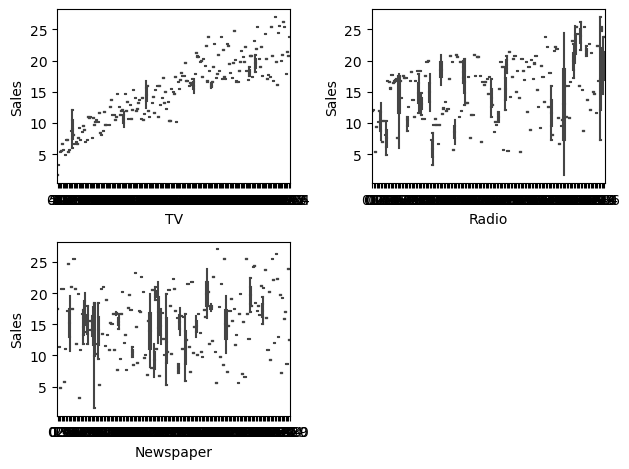

In [20]:
plt.subplot(2, 2, 1)
sns.boxplot(x='TV', y='Sales', data=df)

plt.subplot(2, 2, 2)
sns.boxplot(x='Radio', y='Sales', data=df)

plt.subplot(2, 2, 3)
sns.boxplot(x='Newspaper', y='Sales', data=df)

plt.tight_layout()
plt.show()

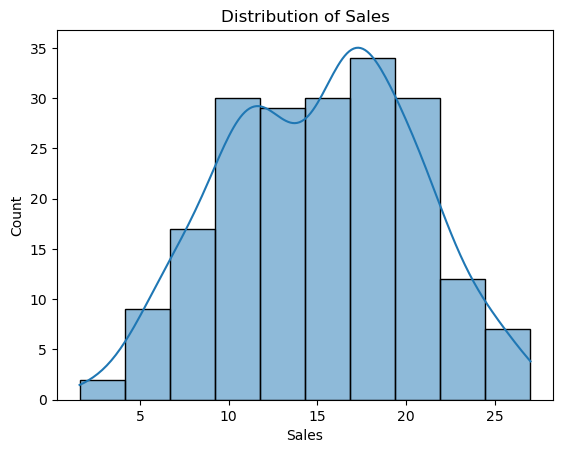

In [21]:
sns.histplot(df['Sales'], kde=True)
plt.title('Distribution of Sales')
plt.show()

In [22]:
X = df[['TV', 'Radio', 'Newspaper']]
Y= df['Sales']

In [23]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [24]:
X_train.shape

(160, 3)

In [25]:
X_test.shape

(40, 3)

In [26]:
Y_train.shape

(160,)

In [27]:
Y_test.shape

(40,)

In [28]:
model_lin = LinearRegression()
model_lin.fit(X_train, Y_train)

Y_pred = model_lin.predict(X_test)

mse_lin = mean_squared_error(Y_test, Y_pred)
r2_lin = r2_score(Y_test, Y_pred)

print('Mean Squared Error:', mse_lin)
print('R-squared Score:', r2_lin)

Mean Squared Error: 2.9077569102710896
R-squared Score: 0.9059011844150826


In [29]:
model_rfr = RandomForestRegressor(n_estimators=100, random_state=417) 
model_rfr.fit(X_train, Y_train)

Y_pred = model_rfr.predict(X_test)

mse_rfr = mean_squared_error(Y_test, Y_pred)
r2_rfr = r2_score(Y_test, Y_pred)

print('Mean Squared Error:', mse_rfr)
print('R-squared Score:', r2_rfr)

Mean Squared Error: 1.4906442250000025
R-squared Score: 0.9517608038225176


In [30]:
lin_reg={
    "R-squared":r2_lin,
    "MSE":mse_lin,
}

rfr={
    "R-squared":r2_rfr,
    "MSE":mse_rfr,
}
combined_metrics={
    'Linear Regression':lin_reg,
    'Random Forest Regressor':rfr
}

df_metrics = pd.DataFrame(combined_metrics)
df_metrics = df_metrics.transpose()
print(df_metrics)

                         R-squared       MSE
Linear Regression         0.905901  2.907757
Random Forest Regressor   0.951761  1.490644
